# Redfin Market Data

## Overview
| Detail Tag            | Information                                                                                        |
|-----------------------|----------------------------------------------------------------------------------------------------|
| Created By | Eric Gilley ehgilley11@gmail.com |
| Input Data Source     | Pandas DataFrame |
| Output Data Source    | Pandas DataFrame |


## Purpose

This project walks through downloading property data from Redfin with the goal of using the information to create a Tableau dashboard.

Please click on the image above or the heading of the project to get direct access to the dashboard.

## The Problem

Two real estate investors focus mainly on Ocean County New Jersey. The investors spend a lot of time analyzing properties at the micro-level. They came to me for a way to "see the forrest through the trees".

They wanted an easy way to check on the Ocean County real estate market at a marco level.

All of the information below walks through how the data was extracted from RedFin and imported to Tableau using a Google Colab notebook and python.

## <font color="white">Imports</font>

In [ ]:
from google.colab import drive, files  # Specific to Google Colab, used for file management
from datetime import datetime  # For working with date and time
import pandas as pd  # Import Pandas library for data manipulation and analysis
import time  # For timing the execution of code
import warnings  # To handle warning messages
import requests  # Library for making HTTP requests
import io  # For working with streams and binary data

# Set Pandas options to display all columns in DataFrame
pd.set_option('display.max_columns', None)

# Filter out warnings to avoid clutter in output
warnings.filterwarnings('ignore')


## <font color="white">Data</font>

### Data Source

The data is sourced from [Redfin's zipcode-level data](https://www.redfin.com/news/data-center/).

Ideally, I'd download all the data and be able to use one notebook to filter data for every state. Unfortunatley, it appears creating a Notebook for each state you want to analyze is the most feasible option.

In this case I filtered for New Jersey and limited our chunk size to not use up all the RAM.

In [ ]:
state_code = 'NJ'  # Define the state code to filter by

chunk_size = 100000  # Adjust the chunk size according to your system's memory capacity

url = 'https://redfin-public-data.s3.us-west-2.amazonaws.com/redfin_market_tracker/zip_code_market_tracker.tsv000.gz'

startTime = time.time()  # Record the start time for measuring execution time

response = requests.get(url, stream=True)  # Send an HTTP GET request to the URL, streaming the response content

if response.status_code == 200:  # Check if the response status is successful
    # Read the streamed content in chunks, using specified chunk size, and handle potential problematic lines
    df_chunks = pd.read_csv(io.BytesIO(response.content), compression='gzip', sep='\t', chunksize=chunk_size, on_bad_lines='skip')

    filtered_chunks = []  # Initialize an empty list to store filtered chunks of the DataFrame
    for chunk in df_chunks:  # Loop through each chunk of the DataFrame
        # Filter each chunk based on the 'state_code' column
        filtered_chunk = chunk[chunk['state_code'] == state_code]
        filtered_chunks.append(filtered_chunk)  # Append each filtered chunk to the list

    df_filtered = pd.concat(filtered_chunks)  # Concatenate all filtered chunks into a single DataFrame
    executionTime = (time.time() - startTime)  # Calculate the execution time
    print('Execution time in minutes: ' + str(round(executionTime / 60, 2)))  # Display the execution time in minutes
    print('Num of rows after filtering by state:', len(df_filtered))  # Display the total number of rows in the filtered DataFrame
    print('Num of cols:', len(df_filtered.columns))  # Display the total number of columns in the filtered DataFrame
    display(df_filtered.head())  # Show the first few rows of the filtered DataFrame
else:
    print("Failed to retrieve data")  # Display a message if data retrieval fails


## <font color="white">Transformations</font>

In [ ]:
df_filtered.describe()

,period_duration,region_type_id,table_id,city,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code
count,226377.0,226377.0,226377.000000,0.0,226377.000000,2.258800e+05,215953.000000,192604.000000,2.117480e+05,201815.000000,182948.000000,219010.000000,209314.000000,186456.000000,208581.000000,198724.000000,180165.000000,226377.000000,216439.000000,193124.000000,172070.000000,151594.000000,141054.000000,212195.000000,202283.000000,183323.000000,211954.000000,202661.000000,183609.000000,0.0,0.0,0.0,224213.000000,214180.000000,190394.000000,224318.000000,214373.000000,190894.000000,226377.000000,216439.000000,193124.000000,0.0,0.0,0.0,172070.000000,151594.000000,141054.000000,226377.000000
mean,90.0,2.0,2881.163449,NaN,3.942397,3.673114e+05,0.031924,0.141927,3.972621e+05,0.036549,0.118384,222.183827,0.052432,0.199688,241.718273,0.062507,0.165464,31.231000,0.053768,0.163042,9.861644,0.231071,0.329690,40.872928,0.045789,0.147291,46.758150,0.027250,0.061114,NaN,NaN,NaN,85.932223,-0.522759,-7.464416,0.975761,0.000522,0.006788,0.257727,0.003329,0.041289,NaN,NaN,NaN,0.242454,0.000009,0.014790,31267.076929
std,0.0,0.0,213.582691,NaN,4.254086,2.798167e+05,1.263112,2.227594,3.490642e+05,2.499497,2.398722,2064.985140,4.986053,8.596290,2008.335407,5.986260,8.466745,43.132399,0.382207,0.785642,12.448518,0.948149,1.158538,53.901512,0.389615,1.148175,65.878979,0.326030,1.243928,NaN,NaN,NaN,89.481109,49.503310,85.900624,0.054045,0.028441,0.052238,0.265761,0.127969,0.242296,NaN,NaN,NaN,0.260346,0.298322,0.300917,9982.366562
min,90.0,2.0,2508.000000,NaN,-1.000000,8.500000e+02,-0.996905,-0.996902,8.500000e+02,-0.997998,-0.998941,0.372807,-0.999443,-0.999487,0.269854,-0.999284,-0.999127,1.000000,-0.888889,-0.956522,1.000000,-0.950000,-0.954545,1.000000,-0.923077,-0.950000,1.000000,-0.923077,-0.952381,NaN,NaN,NaN,1.000000,-3048.000000,-2944.000000,0.500000,-0.810102,-1.168471,0.000000,-1.000000,-1.000000,NaN,NaN,NaN,0.000000,-1.000000,-1.000000,10900.000000
25%,90.0,2.0,2706.000000,NaN,-1.000000,1.935000e+05,-0.032349,-0.047665,2.100000e+05,-0.036147,-0.042471,124.697811,-0.022222,-0.024527,134.452161,-0.023023,-0.018918,4.000000,-0.125000,-0.228571,2.000000,-0.315789,-0.300000,6.000000,-0.146341,-0.240000,7.000000,-0.107143,-0.304348,NaN,NaN,NaN,39.000000,-7.500000,-29.000000,0.954448,-0.006110,-0.011100,0.000000,-0.025219,-0.042857,NaN,NaN,NaN,0.000000,-0.126374,-0.111111,35084.000000
50%,90.0,2.0,2907.000000,NaN,4.000000,3.075000e+05,0.000000,0.064865,3.250000e+05,0.000000,0.056678,187.324437,0.000000,0.060513,196.453527,0.000000,0.053318,15.000000,0.000000,0.000000,5.000000,0.000000,0.000000,22.000000,0.000000,0.000000,23.000000,0.000000,-0.090909,NaN,NaN,NaN,67.500000,0.000000,-5.000000,0.976574,0.000000,0.006020,0.181818,0.000000,0.007692,NaN,NaN,NaN,0.200000,0.000000,0.000000,35154.000000
75%,90.0,2.0,3062.000000,NaN,6.000000,4.625000e+05,0.046154,0.192661,4.897828e+05,0.047619,0.168614,261.213983,0.034655,0.165482,270.328044,0.033358,0.142090,41.000000,0.142857,0.307692,12.000000,0.478261,0.544960,53.000000,0.155340,0.250000,58.000000,0.095238,0.147059,NaN,NaN,NaN,106.000000,7.000000,15.000000,1.000000,0.007209,0.024669,0.400000,0.031876,0.128205,NaN,NaN,NaN,0.384615,0.125000,0.154423,35614.000000
max,90.0,2.0,7054.0000

The code above gives provides a super quick and dirty exploritory overview of the data.




### Sample Dataset

We're going to filter by zip codes in the dashboard, but want to make sure we're getting the most accurate zip codes possible.

To do this we'll use data from a trusted GitHub Repository.

In [ ]:
# Get zip code county data
geo_data_url = 'https://raw.githubusercontent.com/scpike/us-state-county-zip/master/geo-data.csv'
df_geo = pd.read_csv(geo_data_url)  # Load the data into a DataFrame
print('Num of rows:', len(df_geo))  # Print the number of rows in the DataFrame
print('Num of columns:', len(df_geo.columns))  # Print the number of columns in the DataFrame
df_geo.head()  # Display the first few rows of the DataFrame


Num of rows: 33103
Num of columns: 6


,state_fips,state,state_abbr,zipcode,county,city
0,1,Alabama,AL,35004,St. Clair,Acmar
1,1,Alabama,AL,35005,Jefferson,Adamsville
2,1,Alabama,AL,35006,Jefferson,Adger
3,1,Alabama,AL,35007,Shelby,Keystone
4,1,Alabama,AL,35010,Tallapoosa,New site


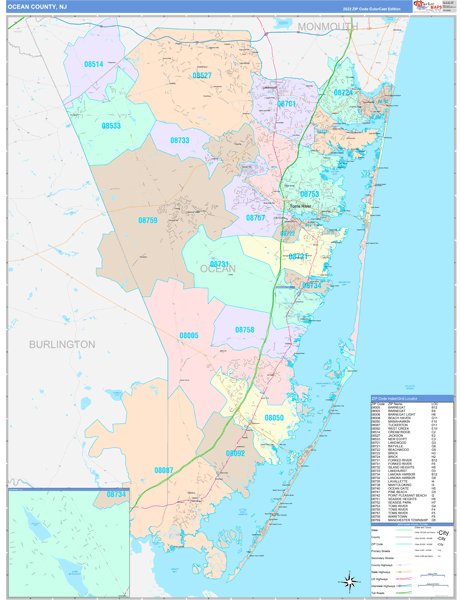

In [ ]:
from IPython.display import Image, display
display(Image('https://generatedimages.intelligentdirect.com/images/48-600-600/zip5digit/colorcast-county-zipshade/Ocean-nj.gif'))

For our visualization we'll only be looking at data from Ocean County.

In [ ]:
# filter on single county
df_geo_county = df_geo.loc[(df_geo['state_abbr'] == 'NJ') &  # Filter for New Jersey state abbreviation
                           (df_geo['county'].isin(['Ocean']))]  # Filter for 'Ocean' county

# create feature to check if zip code is valid
df_geo_county['valid_zip_code'] = df_geo_county.apply(lambda x: x['zipcode'].isnumeric(), axis=1)  # Create 'valid_zip_code' feature based on numeric check

print('Dataset:')
print(df_geo_county.groupby(['valid_zip_code', 'county'])['zipcode'].count())  # Display zip code count based on validity and county
print(' ')
print('Invalid zip codes:', df_geo_county.loc[df_geo_county['valid_zip_code'] == False]['zipcode'].unique())  # Display invalid zip codes


Dataset:
valid_zip_code  county
False           Ocean      1
True            Ocean     29
Name: zipcode, dtype: int64
 
Invalid zip codes: ['087XX']


In [ ]:
# filter on only valid zip codes
df_geo_county_valid = df_geo_county.loc[df_geo_county['valid_zip_code'] == True]  # Filter for rows with valid zip codes
print('Num of VALID zip codes:', len(df_geo_county_valid))  # Display the number of rows with valid zip codes
df_geo_county_valid.head(1)  # Display the first row of the DataFrame containing valid zip codes


Num of VALID zip codes: 29


,state_fips,state,state_abbr,zipcode,county,city,valid_zip_code
18237,34,New jersey,NJ,08005,Ocean,Barnegat,True


In [ ]:
# get zip code from region field
df_filtered['zipcode'] = df_filtered.apply(lambda x: x['region'].split(':')[1].strip(), axis=1)  # Extract zip code from the 'region' field

# merge market data and geo zip codes
df_merge = pd.merge(
    df_filtered,  # Left DataFrame to merge
    df_geo_county_valid[['zipcode', 'city', 'county']],  # Right DataFrame with selected columns for merging
    how='inner',  # Perform an inner join, keeping only matching zip codes from both tables
    on=['zipcode']  # Merge based on the 'zipcode' field
)

print('Num of rows:', len(df_merge))  # Display the number of rows in the merged DataFrame

df_merge.head()  # Display the first few rows of the merged DataFrame


Num of rows: 13531


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city_x,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode,city_y,county
0,2018-05-01,2018-07-31,90,zip code,2,3162,f,Zip Code: 08757,NaN,New Jersey,NJ,All Residential,-1,185000.0,0.027778,0.121212,181000.0,-0.021622,0.065019,139.285440,0.011899,0.094242,140.690282,-0.009540,0.067052,331.0,0.074675,0.006079,74.0,0.013699,-0.260000,374.0,-0.071960,-0.010582,366.0,-0.013477,0.402299,NaN,NaN,NaN,48.0,1.5,11.0,0.978111,-0.004566,-0.001802,0.181269,-0.039510,-0.028458,NaN,NaN,NaN,0.243243,-0.085524,-0.066757,"New Brunswick, NJ",35154,2023-12-17 14:27:30,08757,Toms river,Ocean
1,2016-07-01,2016-09-30,90,zip code,2,3162,f,Zip Code: 08757,NaN,New Jersey,NJ,Single Family Residential,6,150000.0,0.020408,0.034483,164999.5,0.000603,0.090185,111.209964,0.006914,-0.007169,125.113809,-0.005385,0.101789,303.0,-0.084592,0.109890,96.0,-0.010309,0.391304,348.0,-0.079365,-0.002865,297.0,-0.057143,-0.282609,NaN,NaN,NaN,44.0,-6.0,-20.0,0.970010,0.002174,0.003924,0.181518,0.024418,0.064302,NaN,NaN,NaN,0.239583,0.033398,0.065670,"New Brunswick, NJ",35154,2023-12-17 14:27:30,08757,Toms river,Ocean
2,2016-04-01,2016-06-30,90,zip code,2,3162,f,Zip Code: 08757,NaN,New Jersey,NJ,All Residential,-1,142500.0,0.055556,0.055556,159900.0,0.008833,0.103520,107.593795,0.025140,0.011336,117.573529,0.026407,0.023891,315.0,0.089965,0.193182,85.0,0.062500,0.231884,385.0,0.078431,-0.085511,313.0,0.016234,-0.295045,NaN,NaN,NaN,64.0,-10.0,-8.0,0.967142,0.003451,0.010070,0.161905,0.009656,0.029329,NaN,NaN,NaN,0.235294,-0.102206,-0.141517,"New Brunswick, NJ",35154,2023-12-17 14:27:30,08757,Toms river,Ocean
3,2018-01-01,2018-03-31,90,zip code,2,3162,f,Zip Code: 08757,NaN,New Jersey,NJ,All Residential,-1,173000.0,0.004354,0.153333,185000.0,0.000541,0.094675,127.509528,-0.008797,0.048703,139.590747,0.002642,0.105202,215.0,-0.044444,-0.073276,61.0,0.089286,-0.314607,323.0,0.183150,0.055556,331.0,0.060897,0.277992,NaN,NaN,NaN,59.0,3.0,9.0,0.977769,0.004034,0.004047,0.200000,0.013333,0.001724,NaN,NaN,NaN,0.327869,-0.118560,-0.042918,"New Brunswick, NJ",35154,2023-12-17 14:27:30,08757,Toms river,Ocean
4,2018-04-01,2018-06-30,90,zip code,2,3162,f,Zip Code: 08757,NaN,New Jersey,NJ,Single Family Residential,6,180000.0,0.028571,0.111111,185000.0,0.000000,0.057747,137.795276,0.052818,0.082536,142.414530,0.013925,0.069159,307.0,0.189922,-0.009677,71.0,-0.219780,-0.244681,398.0,0.096419,0.121127,369.0,0.135385,0.476000,NaN,NaN,NaN,46.0,-3.0,9.0,0.982800,-0.000295,0.002850,0.221498,-0.011060,0.018273,NaN,NaN,NaN,0.338028,-0.002631,-0.023674,"New Brunswick, NJ",35154,2023-12-17 14:27:30,08757,Toms river,Ocean


### Data Cleaning

There are a few features I can add to the data to make it easier to use later in Tableau. I'll also use the more reliable zip code and city data from the 'Geo City' data.

But first there was an apparant error in the median days on market MoM data.

In [ ]:
df_merge.loc[(df_merge['zipcode'] == '08087') &
             (df_merge['property_type'] == 'Single Family Residential')]\
  .sort_values(by=['period_begin']).tail(2)\
  [['period_begin', 'median_dom', 'median_dom_mom', 'median_dom_yoy']]

,period_begin,median_dom,median_dom_mom,median_dom_yoy
7379,2023-08-01,36.5,-0.5,-19.5
7278,2023-09-01,33.0,-3.5,-30.5


The default median days on market isn't correct. It should be a percentage instead of a number. We will test and correct the error below.

In [ ]:
# Create a copy of the merged DataFrame for testing purposes
df_test = df_merge.copy()

# Calculate the percentage change in 'median_dom' and assign it to a new column 'median_dom_mom_correction'
df_test['median_dom_mom_correction'] = df_test.sort_values(by=['period_begin'])['median_dom'].pct_change()

# Filter the 'df_test' DataFrame for a specific zip code and property type
# Sort by 'period_begin' and select the last two entries
# Display specific columns: 'period_begin', 'median_dom', 'median_dom_mom', 'median_dom_yoy', 'median_dom_mom_correction'
df_test.loc[(df_test['zipcode'] == '08087') &  # Filter for a specific zip code
             (df_test['property_type'] == 'Single Family Residential')]\
  .sort_values(by=['period_begin']).tail(2)\
  [['period_begin', 'median_dom', 'median_dom_mom', 'median_dom_yoy', 'median_dom_mom_correction']]  # Display selected columns


,period_begin,median_dom,median_dom_mom,median_dom_yoy,median_dom_mom_correction
7379,2023-08-01,36.5,-0.5,-19.5,0.825
7278,2023-09-01,33.0,-3.5,-30.5,1.750


### Add Features and Fixes

In [ ]:

df_features = df_merge.copy() # Create a copy of the merged DataFrame for feature engineering or further analysis

# Display the maximum 'period_begin' and 'period_end' dates in the DataFrame
print('Max begin date:', df_features['period_begin'].max())  # Display the maximum 'period_begin' date
print('Max end date:', df_features['period_end'].max())  # Display the maximum 'period_end' date
max_end_date = df_features['period_end'].max()  # Store the maximum 'period_end' date in a variable for potential use in subsequent analysis

# 1) Flag for the most recent date
df_features['latest_period'] = df_features.apply(
    lambda x: True if x['period_end'] == max_end_date else False, axis=1)  # Create a flag for the most recent date

# 2) Remove 'Redfin city' and rename 'Geo city' columns
df_features = df_features.drop(columns=['city_x'])  # Remove 'Redfin city' column
df_features = df_features.rename(columns={'city_y': 'city'})  # Rename 'Geo city' column to 'city'

# 3) Fix 'median days on market (mom)' - calculate percentage change in 'median_dom' values
df_features['median_dom_mom'] = df_features.sort_values(by=['period_begin'])['median_dom'].pct_change()

# View the first 5 rows of the modified DataFrame
df_features.head()  # Display the first 5 rows of the DataFrame after modifications



Max begin date: 2023-09-01
Max end date: 2023-11-30


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode,city,county,latest_period
0,2018-05-01,2018-07-31,90,zip code,2,3162,f,Zip Code: 08757,New Jersey,NJ,All Residential,-1,185000.0,0.027778,0.121212,181000.0,-0.021622,0.065019,139.285440,0.011899,0.094242,140.690282,-0.009540,0.067052,331.0,0.074675,0.006079,74.0,0.013699,-0.260000,374.0,-0.071960,-0.010582,366.0,-0.013477,0.402299,NaN,NaN,NaN,48.0,0.066667,11.0,0.978111,-0.004566,-0.001802,0.181269,-0.039510,-0.028458,NaN,NaN,NaN,0.243243,-0.085524,-0.066757,"New Brunswick, NJ",35154,2023-12-17 14:27:30,08757,Toms river,Ocean,False
1,2016-07-01,2016-09-30,90,zip code,2,3162,f,Zip Code: 08757,New Jersey,NJ,Single Family Residential,6,150000.0,0.020408,0.034483,164999.5,0.000603,0.090185,111.209964,0.006914,-0.007169,125.113809,-0.005385,0.101789,303.0,-0.084592,0.109890,96.0,-0.010309,0.391304,348.0,-0.079365,-0.002865,297.0,-0.057143,-0.282609,NaN,NaN,NaN,44.0,-0.348148,-20.0,0.970010,0.002174,0.003924,0.181518,0.024418,0.064302,NaN,NaN,NaN,0.239583,0.033398,0.065670,"New Brunswick, NJ",35154,2023-12-17 14:27:30,08757,Toms river,Ocean,False
2,2016-04-01,2016-06-30,90,zip code,2,3162,f,Zip Code: 08757,New Jersey,NJ,All Residential,-1,142500.0,0.055556,0.055556,159900.0,0.008833,0.103520,107.593795,0.025140,0.011336,117.573529,0.026407,0.023891,315.0,0.089965,0.193182,85.0,0.062500,0.231884,385.0,0.078431,-0.085511,313.0,0.016234,-0.295045,NaN,NaN,NaN,64.0,-0.340206,-8.0,0.967142,0.003451,0.010070,0.161905,0.009656,0.029329,NaN,NaN,NaN,0.235294,-0.102206,-0.141517,"New Brunswick, NJ",35154,2023-12-17 14:27:30,08757,Toms river,Ocean,False
3,2018-01-01,2018-03-31,90,zip code,2,3162,f,Zip Code: 08757,New Jersey,NJ,All Residential,-1,173000.0,0.004354,0.153333,185000.0,0.000541,0.094675,127.509528,-0.008797,0.048703,139.590747,0.002642,0.105202,215.0,-0.044444,-0.073276,61.0,0.089286,-0.314607,323.0,0.183150,0.055556,331.0,0.060897,0.277992,NaN,NaN,NaN,59.0,-0.709360,9.0,0.977769,0.004034,0.004047,0.200000,0.013333,0.001724,NaN,NaN,NaN,0.327869,-0.118560,-0.042918,"New Brunswick, NJ",35154,2023-12-17 14:27:30,08757,Toms river,Ocean,False
4,2018-04-01,2018-06-30,90,zip code,2,3162,f,Zip Code: 08757,New Jersey,NJ,Single Family Residential,6,180000.0,0.028571,0.111111,185000.0,0.000000,0.057747,137.795276,0.052818,0.082536,142.414530,0.013925,0.069159,307.0,0.189922,-0.009677,71.0,-0.219780,-0.244681,398.0,0.096419,0.121127,369.0,0.135385,0.476000,NaN,NaN,NaN,46.0,-0.657993,9.0,0.982800,-0.000295,0.002850,0.221498,-0.011060,0.018273,NaN,NaN,NaN,0.338028,-0.002631,-0.023674,"New Brunswick, NJ",35154,2023-12-17 14:27:30,08757,Toms river,Ocean,False


## <font color="white">Output</font>

Finally, the data will be exported directly to Google Sheets.

This will let us connect Tableau directly to the spreadsheet, making it easier to update.

In [ ]:
# Import necessary modules for Google Colab authentication and Google Sheets interaction
from google.colab import auth  # Importing Google Colab authentication module
from google.auth import default  # Importing default Google authentication

try:
    import gspread  # Try importing gspread module
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):  # Check if running in Google Colab
        %pip install gspread  # Install gspread if not already installed
    import gspread  # Import gspread module after installation


In [ ]:
auth.authenticate_user()  # Authenticate user for Google Sheets access
creds, _ = default()  # Fetch default credentials
gc = gspread.authorize(creds)  # Authorize the Google Sheets API using the fetched credentials


In [ ]:
worksheet = gc.open("ocean-county-real-estate")
sheet1 = worksheet.sheet1

In [ ]:
# Replace NaN values with an empty string ''
df_features_cleaned = df_features.fillna('')

In [ ]:
# Update a Google Sheets document (sheet1) with DataFrame values
# Append the header row (columns) followed by the DataFrame values
sheet1.update([df_features_cleaned.columns.values.tolist()] + df_features_cleaned.values.tolist())


Next, I created seperate worksheets in a new Tableau project for each graph.

I combined the graphs and stats into the dashboard we see today! It is customizable on a variety of filters to make tracking the housing market in Ocean Count much easier.

## Results

The two investor friends of mine now have an easy and customizable way to check on a variety of important metric specific to Ocean County. They can filter for zip code and cities as they see fit.

They are pleased with the results!

# The End :)